In [16]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as mp

In [17]:
  # n--> number of nodes in the initial network
  # m--> number of edges to be connected to the new node
  # m0--> number of nodes in the final network
def barabasi_model(n,m,m0):
    G = nx.windmill_graph(3,3)
    node_degrees = np.array([G.degree(node) for node in range(0,n)])

    for i in range(n,m0):
      probabilities = node_degrees / node_degrees.sum()  #Preferential Attachment
      targets = np.random.choice(np.arange(i), size=m, replace=False, p=probabilities) #choosing m nodes to which we need to connect our new node

      if(i==100):
        nx.draw(G, pos=nx.spring_layout(G),node_size=30,node_color='red')
        plt.title("Barabasi Graph at 100 Nodes")
        plt.show()
      if(i==1000):
        nx.draw(G, pos=nx.spring_layout(G),node_size=30,node_color='red')
        plt.title("Barabasi Graph at 1000 Nodes")
        plt.show()
      if(i==5000):
        nx.draw(G, pos=nx.spring_layout(G),node_size=30,node_color='red')
        plt.title("Barabasi Graph at 5000 Nodes")
        plt.show()
      if(i==9999):
        nx.draw(G, pos=nx.spring_layout(G),node_size=30,node_color='red')
        plt.title("Barabasi Graph at 10000 Nodes")
        plt.show()

      G.add_node(i)
      G.add_edges_from((i, target) for target in targets)


      # update the degree of the nodes to which the new node is connected
      node_degrees[targets]+=1
      node_degrees= np.append(node_degrees,m)


    return G


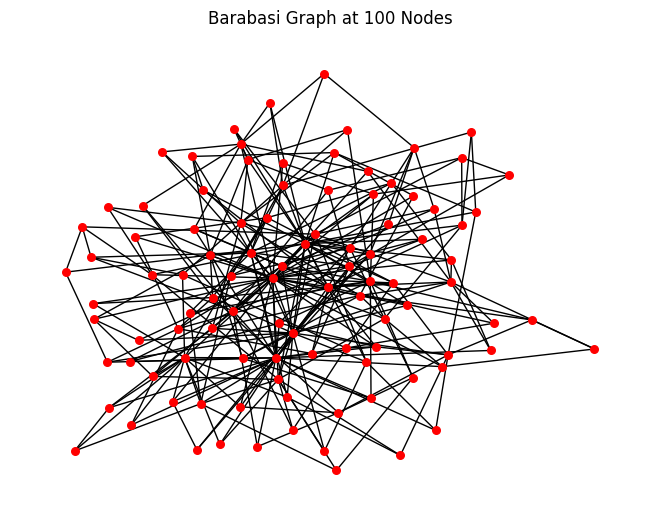

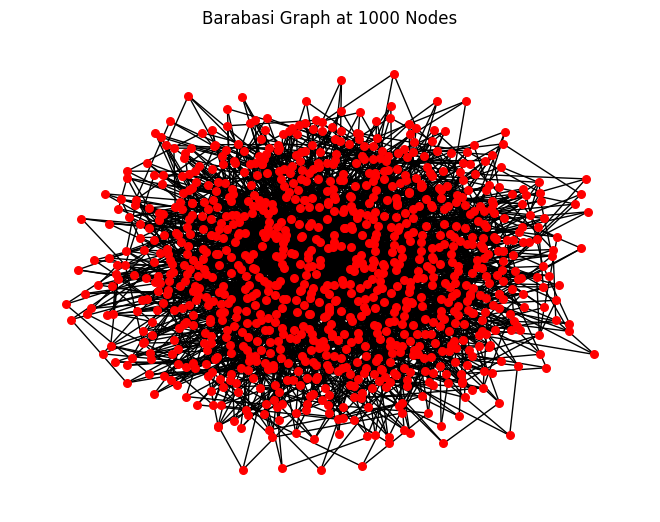

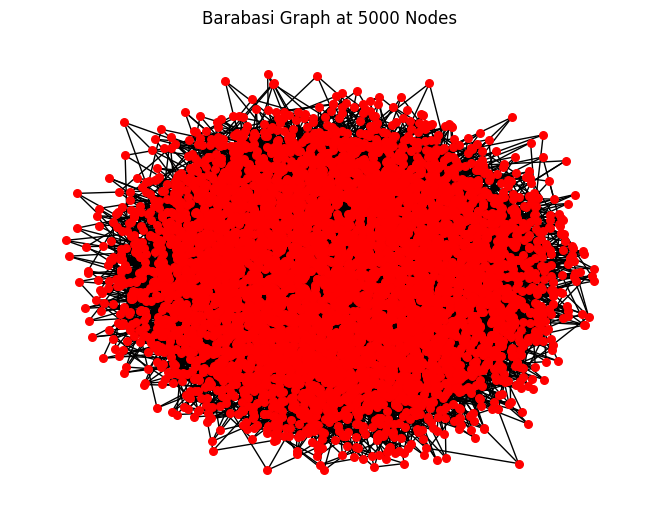

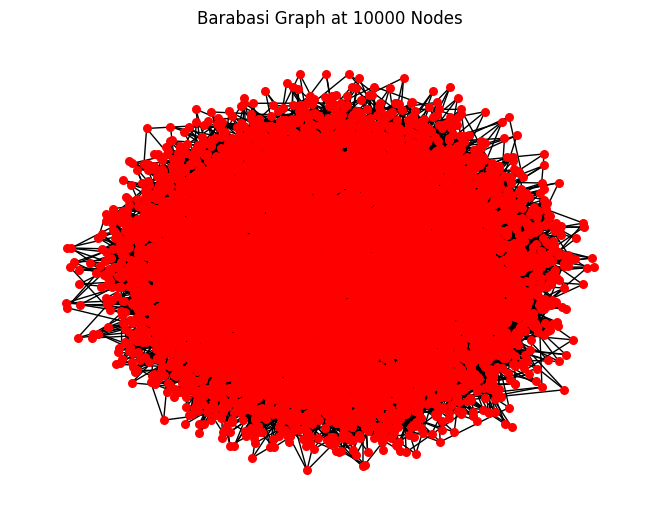

10000 29988


In [18]:
n=7
m=3
m0=10000

scale_free_network= barabasi_model(n,m,m0)
print(scale_free_network.number_of_nodes(), scale_free_network.number_of_edges())
# Convert the graph to a DataFrame of edges
edges_df = nx.to_pandas_edgelist(scale_free_network)
edges_df.head()
edges_df.to_csv("barabasi.csv")


In [4]:
degree_centrality = nx.degree_centrality(scale_free_network)
closeness_centrality = nx.closeness_centrality(scale_free_network)
betweenness_centrality = nx.betweenness_centrality(scale_free_network, normalized=True, endpoints=False)
eigenvector_centrality = nx.eigenvector_centrality(scale_free_network)

print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)

Degree Centrality: {0: 0.0356035603560356, 1: 0.0033003300330033004, 2: 0.0028002800280028, 3: 0.007800780078007801, 4: 0.018001800180018002, 5: 0.008200820082008202, 6: 0.021702170217021702, 7: 0.031103110311031103, 8: 0.021202120212021204, 9: 0.0107010701070107, 10: 0.0031003100310031005, 11: 0.0032003200320032004, 12: 0.015101510151015102, 13: 0.018301830183018303, 14: 0.005800580058005801, 15: 0.010101010101010102, 16: 0.0084008400840084, 17: 0.0088008800880088, 18: 0.011901190119011902, 19: 0.0027002700270027003, 20: 0.004100410041004101, 21: 0.0035003500350035003, 22: 0.009500950095009501, 23: 0.004300430043004301, 24: 0.011701170117011701, 25: 0.008200820082008202, 26: 0.0044004400440044, 27: 0.0037003700370037006, 28: 0.0025002500250025004, 29: 0.006100610061006101, 30: 0.0026002600260026003, 31: 0.006200620062006201, 32: 0.0023002300230023005, 33: 0.0024002400240024004, 34: 0.006700670067006701, 35: 0.002000200020002, 36: 0.008700870087008702, 37: 0.0032003200320032004, 38: 0.

In [5]:
alpha = 0.1  # Damping factor
beta = 1.0 / max(nx.adjacency_spectrum(scale_free_network).real)  # Scaling factor
max_iter = 10000  # Increased maximum number of iterations
# katz_centrality = nx.katz_centrality(G, alpha=alpha, beta=beta, max_iter=max_iter)


# # Calculate PageRank centrality
pagerank_centrality = nx.pagerank(scale_free_network, alpha=0.85)  # Damping factor

# # Print centrality measures
# print("Katz Centrality:", katz_centrality)
print("PageRank Centrality:", pagerank_centrality)

PageRank Centrality: {0: 0.005025885723708134, 1: 0.00048188410459914794, 2: 0.00040565095640662986, 3: 0.0011051166299363016, 4: 0.0025421336663019106, 5: 0.0011759171800628512, 6: 0.0030649285909819905, 7: 0.004418530984216454, 8: 0.0030149990388915098, 9: 0.0015345858152085597, 10: 0.0004354674229340215, 11: 0.00047630322470824786, 12: 0.0021816837275882954, 13: 0.002583035014373081, 14: 0.0008246575095851604, 15: 0.0014368413251359968, 16: 0.0011932435586675685, 17: 0.001242447739845812, 18: 0.0016989143420239369, 19: 0.0003880027298570627, 20: 0.0005857513014844061, 21: 0.0005183495379861187, 22: 0.0013402119391251097, 23: 0.0006201523854332929, 24: 0.0016743844072395133, 25: 0.0011918951777184245, 26: 0.0006301529598010102, 27: 0.000534278480905907, 28: 0.000364177062137884, 29: 0.0008906117482904582, 30: 0.00038469241087730913, 31: 0.0008943701790480387, 32: 0.00033150570158817705, 33: 0.00033725547496666594, 34: 0.0009641757780992243, 35: 0.00029902579283962313, 36: 0.001266669

In [6]:
# Calculate local clustering coefficient for each node
local_clustering = nx.clustering(scale_free_network)

# Calculate global clustering coefficient
global_clustering = nx.transitivity(scale_free_network)

# Calculate average local clustering coefficient
average_local_clustering = nx.average_clustering(scale_free_network)

# Print results
# print("Local Clustering Coefficients:")
# for node, coefficient in local_clustering.items():
#     print(f"Node {node}: {coefficient}")

print("\nGlobal Clustering Coefficient:", global_clustering)
print("Average Local Clustering Coefficient:", average_local_clustering)


Global Clustering Coefficient: 0.0026843921769142275
Average Local Clustering Coefficient: 0.005231218281067143


In [7]:
#Finding the Giant Component
Gcc = sorted(nx.connected_components(scale_free_network), key=len, reverse=True)
giant_component = scale_free_network.subgraph(Gcc[0])

# plt.figure(figsize=(8, 6))
# nx.draw(giant_component, node_color='lightblue', edge_color='gray')
# plt.title("Giant Component of the Graph")
# plt.show()





In [8]:
print("Information about the giant component:")
print("Number of nodes:", giant_component.number_of_nodes())
print("Number of edges:", giant_component.number_of_edges())
print("Average degree:", sum(dict(giant_component.degree()).values()) / giant_component.number_of_nodes())

Information about the giant component:
Number of nodes: 10000
Number of edges: 29988
Average degree: 5.9976


In [13]:
sorted_dict_degree = {k: v for k, v in sorted(degree_centrality.items(), key=lambda item: item[1],reverse=True)}
sorted_dict_closeness = {k: v for k, v in sorted(closeness_centrality.items(), key=lambda item: item[1],reverse=True)}
sorted_dict_between = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1],reverse=True)}
sorted_dict_eigen = {k: v for k, v in sorted(eigenvector_centrality.items(), key=lambda item: item[1],reverse=True)}

print({k: sorted_dict_degree[k] for k in list(sorted_dict_degree)[:10]})
print({k: sorted_dict_closeness[k] for k in list(sorted_dict_closeness)[:10]})
print({k: sorted_dict_between[k] for k in list(sorted_dict_between)[:10]})
print({k: sorted_dict_eigen[k] for k in list(sorted_dict_eigen)[:10]})

{0: 0.0356035603560356, 7: 0.031103110311031103, 6: 0.021702170217021702, 8: 0.021202120212021204, 13: 0.018301830183018303, 4: 0.018001800180018002, 12: 0.015101510151015102, 18: 0.011901190119011902, 24: 0.011701170117011701, 9: 0.0107010701070107}
{0: 0.37251322554206096, 7: 0.3680297397769517, 6: 0.35427295918367346, 4: 0.35185445844183266, 8: 0.35137224584460763, 13: 0.34722366913220126, 12: 0.33569462163432484, 3: 0.32781456953642385, 9: 0.3255836670899678, 22: 0.32460070120763534}
{0: 0.1446053142848572, 7: 0.12467898340715944, 6: 0.072432573854351, 8: 0.06799682796546043, 13: 0.06281778302367558, 4: 0.06233558170685836, 12: 0.039307333658218827, 18: 0.02694035790299191, 24: 0.025591417934662523, 9: 0.024426089107722062}
{0: 0.4796644316446717, 7: 0.3110326795107028, 6: 0.1946798750245589, 8: 0.16266736410717553, 4: 0.15531855766940483, 13: 0.1295373477996838, 12: 0.11176917832546593, 3: 0.08803700033947193, 22: 0.07868616926937246, 15: 0.07738653888043172}


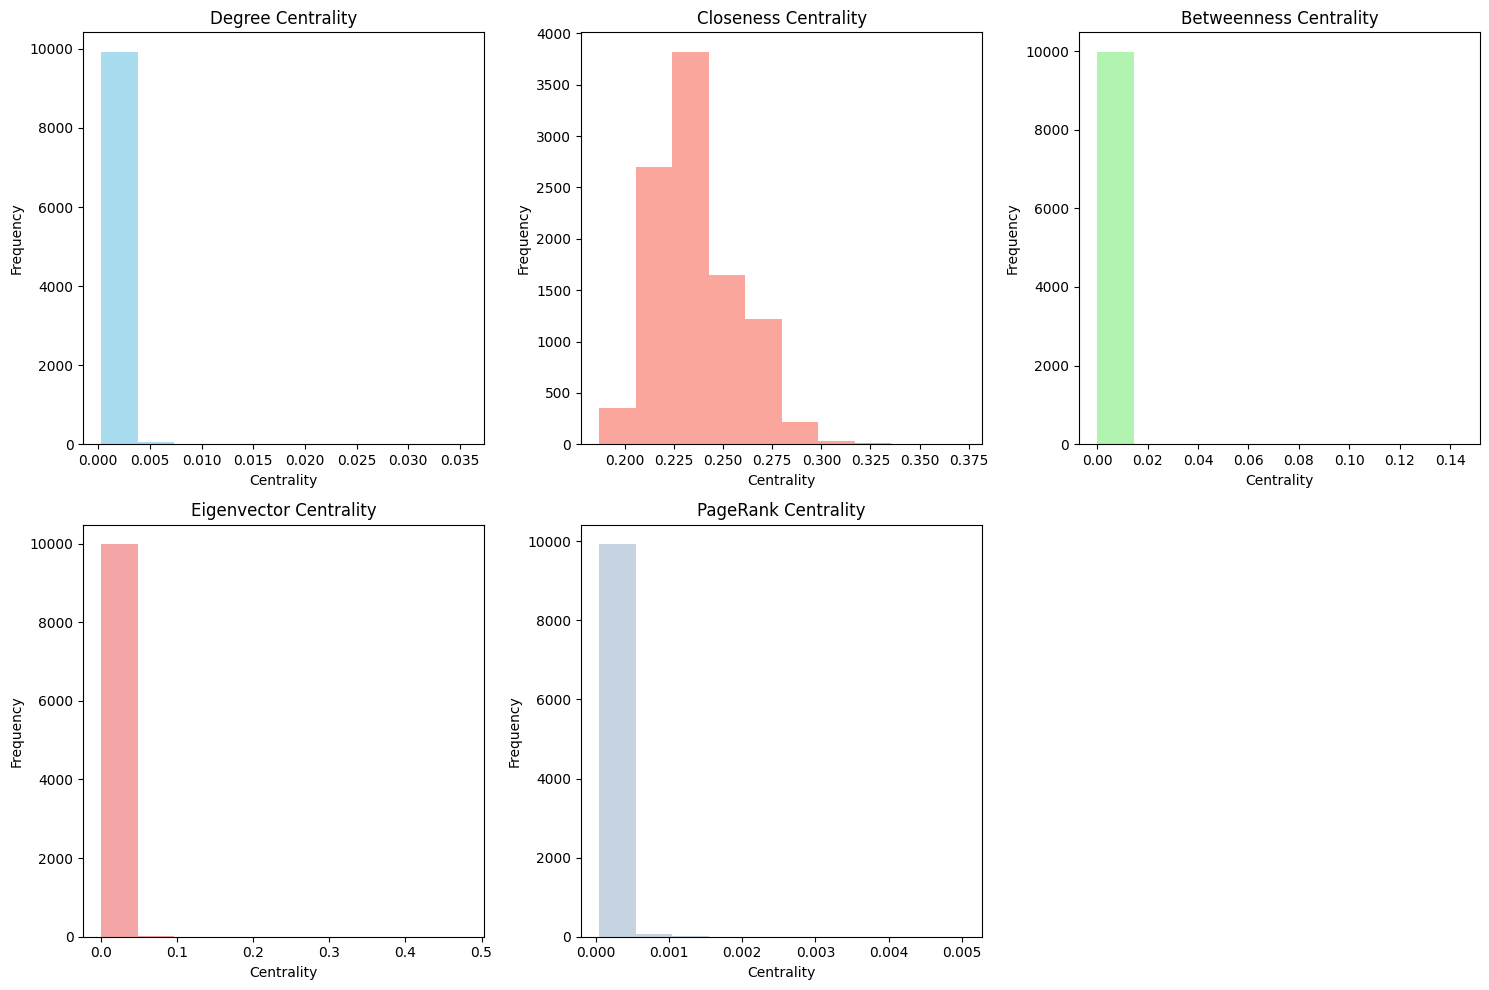

In [19]:
mp.figure(figsize=(15, 10))

mp.subplot(2, 3, 1)
mp.hist(list(degree_centrality.values()), bins=10, alpha=0.7, color='skyblue')
mp.title('Degree Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')

mp.subplot(2, 3, 2)
mp.hist(list(closeness_centrality.values()), bins=10, alpha=0.7, color='salmon')
mp.title('Closeness Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')

mp.subplot(2, 3, 3)
mp.hist(list(betweenness_centrality.values()), bins=10, alpha=0.7, color='lightgreen')
mp.title('Betweenness Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')

mp.subplot(2, 3, 4)
mp.hist(list(eigenvector_centrality.values()), bins=10, alpha=0.7, color='lightcoral')
mp.title('Eigenvector Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')

mp.subplot(2,3,5)
mp.hist(list(pagerank_centrality.values()),bins=10,alpha=0.7,color = 'lightpink')
mp.title('PageRank Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')

mp.subplot(2, 3, 5)
mp.hist(list(pagerank_centrality.values()), bins=10, alpha=0.7, color='lightblue')
mp.title('PageRank Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')

mp.tight_layout()
mp.show()


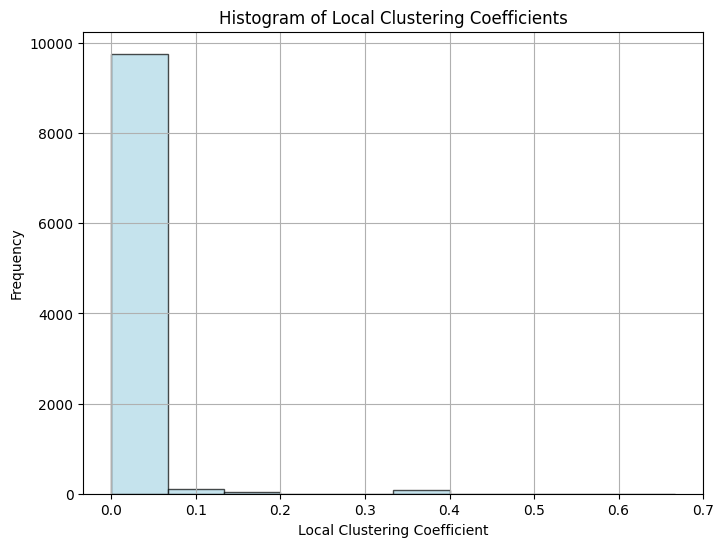

In [12]:
# Calculate local clustering coefficient for each node
local_clustering = nx.clustering(scale_free_network)

# Plot histogram for local clustering coefficients
mp.figure(figsize=(8, 6))
mp.hist(local_clustering.values(), bins=10, color='lightblue', edgecolor='black', alpha=0.7)
mp.xlabel('Local Clustering Coefficient')
mp.ylabel('Frequency')
mp.title('Histogram of Local Clustering Coefficients')
mp.grid(True)
mp.show()

In [21]:
# Calculate reciprocity
reciprocity = nx.reciprocity(scale_free_network)

# Calculate transitivity
transitivity = nx.transitivity(scale_free_network.to_undirected())

# Print results
print("Reciprocity:", reciprocity)
print("Transitivity:", transitivity)

Reciprocity: 0.0
Transitivity: 0.0030134068175012604
